截止目前，我们看到的程序处理过3种类型的对象：`int`、`float`、`str`。
数值类型`int`和`float`都是标量类型，即标量类型的对象没有可以访问的内部结构。
作为比较，`str`被认为是一种有结构的非标量类型。你可以使用索引来从一个字符串中提取单个字符，使用分片来提取子字符串。

这一章，我们介绍额外的结构化的类型。一个是元组tuple，是对`str`相对简单的推广。另外3个是`list`、`range`、`dict`，它们更有趣些。我们也会重新提到函数这一主题，并用一些示例说明用相同的方式来处理函数和其他类型的对象的方便之处。

## 5.1 元组tuple

跟字符串一样，元组是不可变的有序元素序列。区别是元组中的元素不一定是字符。单个元素可以是任意类型，但彼此之间不一定是相同的类型。

元组类型的字面量可写成一个在括号内以逗号分割的元素列表。比如：

In [4]:
#创建一个空元组
t1 = ()
t2 = (1, 'two', 3)
t3 = (1)
#创建一个包含一个元素的元组
t4 = (1,)
print(t1)
print(t2)
print(t3)
print(t4)

()
(1, 'two', 3)
1
(1,)


看下这个示例，你可能自然地相信：包含有单个值1的元组被写为`(1)`。但是，因为括号用来分组表达式，所以为了表示包含这个值的单个元组，我们要写成`(1,)`。几乎每个使用Python的人都曾经不小心地省略了那个烦人的逗号。

可对元组使用重复。比如，

In [5]:
print(3*('a',2))

('a', 2, 'a', 2, 'a', 2)


跟字符串一样，元组可被拼接，索引，分片。比如：

In [9]:
t1 = (1,'two',3)
t2 = (t1,3.25)
print(t2)
#拼接
print(t1+t2)
#索引
print((t1+t2)[3])
#分片
print((t1+t2)[2:5])

((1, 'two', 3), 3.25)
(1, 'two', 3, (1, 'two', 3), 3.25)
(1, 'two', 3)
(3, (1, 'two', 3), 3.25)


第2条赋值语句将名字t2绑定到一个包含指向t1被绑定的元组和浮点数3.25的元组。这是可以的，因为跟Python中的其他事情一样，一个元组就是一个对象，所以元组可以包含元组。因此，第一条print语句输出：
```
((1, 'two', 3), 3.25)
```

第二条print语句输出通过拼接t1和t2被绑定的值生成的值，它是一个有5个元素的元组。它的输出为：
```
(1, 'two', 3, (1, 'two', 3), 3.25)
```
下一条语句选择和输出被拼接元组的第4个元素，紧接着的语句创建并输出那个元组的一个分片，输出为：
```
(1, 'two', 3)
(3, (1, 'two', 3), 3.25)
```

可使用for语句来遍历一个元组的元素，比如：

In [12]:
def intersect(t1, t2):
    '''
    假设t1和t2是元组，返回一个元组包含了既在t1又在t2中的元素。
    '''
    result = ()
    
    for e in t1:
        if e in t2:
            result += (e,)
    
    return result

t1 = (1,2,3)
t2 = (4,2,5)
intersect(t1, t2)

(2,)

### 5.1.1 序列和多重赋值
如果你知道一个序列的长度，那么使用Python的多重赋值语句来抽取单个元素是非常方便的。比如，

In [14]:
x, y = (3,4)
print(x)
print(y)

a, b, c = 'xyz'
print(a)
print(b)
print(c)

3
4
x
y
z


当与返回固定大小序列的函数一起使用时，这种机制特别方便。比如，考虑如下函数定义：

In [1]:
def findExtremeDivisors(n1, n2):
    '''
    假设n1和n2是正整数，那么返回一个元组包含n1和n2的最小公因数(大于1)和最大公因数。如果不存在公因数，则返回(None,None)。
    '''
    minVal, maxVal = (None, None)
    
    for i in range(2, min(n1, n2)+1):
        if n1 % i == 0 and n2 % i == 0:
            if minVal == None:
                minVal = i
            maxVal = i
            
    return (minVal, maxVal)

minDivisor, maxDivisor = findExtremeDivisors(100, 200)
print(minDivisor)
print(maxDivisor)

2
100


## 5.2 范围ranges
跟字符串、元组一样，范围`ranges`是不可变的。`range`函数返回一个`range`类型的对象。如第3.2节里描述的一样，`range`函数取3个整数参数：`start`，`stop`，`step`，返回连续的整数`start`、`start+step`、`start+2*step`等。如果`step`为正，则最后一个元素是小于`stop`的最大的`start+i*step`。如果`step`为负数，则最后一个元素是大于`start`的最小的`start+i*step`。如果仅提供两个参数，则`step`默认为1。如果只有一个参数，则那个参数就是`stop`，`start`默认从0开始，`step`默认是1。

元组的所有操作也对范围range可用，除了拼接和重复。比如，`range(10)[2:6][2]`的值是4。

当对`range`类型对象使用判等运算符`==`时，如果两个范围`range`表示的是相同的整数序列，那么就返回`True`。比如，`range(0,7,2)==range(0,8,2)`的值为True。但是`range(0,7,2)==range(6,-1,2)`的值为False，因为尽管这两个range里包含相同的整数，但是它们发生的顺序不一样。

跟元组类型的对象不一样，一个`range`类型对象占据的空间大小跟长度不成比例。因为一个range完全由start、stop、step确定，所以它可用相对小型的空间来存储。

对range最常用的情形就是for循环，但是range类型的对象可用在任何一个需要整数序列的地方。

In [10]:
print(type(range(10)))

print(range(10)[2:6][2])

print(range(0,7,2)==range(0,8,2))

print(range(0,7,2)==range(6,-1,2))

<class 'range'>
4
True
False


## 5.3 列表和可变性

跟元组一样，一个list是一个有序的值序列，其中每个值可用一个索引来确定。

list字面量的表示语法跟元组类似；不同的是我们使用方括号`[]`来表示列表，使用括号`()`表示元组。

空列表表示为`[]`。单个值的列表表示为`[1]`，在结束括号前不用使用逗号。

比如：

In [12]:
L = ['I did it all', 4, 'love']

for i in range(len(L)):
    print(L[i])

I did it all
4
love


偶尔，由于“方括号用于表示list类型的字面量”这个事实，所以索引列表、对列表分片等可导致一些可见的混淆。比如，表达式`[1,2,3,4][1:3][1]`的值是3，有3种方式来使用方括号。在实践中极少发生这样的情况，因为大部分时候列表是增加式构建的，而不是写成字面量来构建。

列表lists跟元组tuple在一个方面有很大的不同：lists是可变的，tuple是不可变的。

有很多操作符可被用来创建这种不可变类型的对象，变量可被绑定到这些不可变类型的对象。但是不可变类型的对象不能被修改。作为对比，list类型的对象在创建以后可被修改。

乍一看，改变一个对象和将一个对象赋给一个变量之间的区别可能看起来很微妙。但是，只要记住：**在Python中，变量仅仅是一个名称，也就是一个附加到对象上的标签**就好了。

In [2]:
Techs = ['MIT','CalTech']
Ivys = ['Havard', 'Yale', 'Brown']

执行上面的语句后，解释器创建了两个列表，给它们俩绑定了合适的变量名。

下面的赋值语句：

In [3]:
Univs = [Techs, Ivys]
Univs1 = [['MIT','CalTech'],['Havard', 'Yale', 'Brown']]

也创建了新的列表，给它们俩绑定了名字。这些列表的元素是自身也是列表。下面的3条print语句

In [4]:
print('Univs =', Univs)
print('Univs1 =', Univs1)
print(Univs == Univs1)

Univs = [['MIT', 'CalTech'], ['Havard', 'Yale', 'Brown']]
Univs1 = [['MIT', 'CalTech'], ['Havard', 'Yale', 'Brown']]
True


Univs和Univs1被绑定到不同的对象这一点可使用Python内置的函数id来验证，id函数返回关于一个对象的唯一标识符。这个函数允许我们测试对象的相等性。比如：

In [5]:
print(Univs == Univs1)
print(id(Univs)==id(Univs1))
print('Id of Univs =', id(Univs))
print('Id of Univs1 =', id(Univs1))

True
False
Id of Univs = 140334171039808
Id of Univs1 = 140334171040192


注意：Univs的元素不是Techs和Ivys被绑定的列表的拷贝，而就是它们自己。Univs1的元素包含的元素跟Univs相同，但是它们是不同的列表。可通过运行如下代码来验证：

In [6]:
print('Id of Univs[0] and Univs[1]', id(Univs[0]), id(Univs[1]))
print('Id of Univs1[0] and Univs1[1]', id(Univs1[0]), id(Univs1[1]))

Id of Univs[0] and Univs[1] 140334173242624 140334171143616
Id of Univs1[0] and Univs1[1] 140334171152192 140334172802816


为什么会这样？
答：因为列表是可变的。

考虑如下代码：

In [7]:
Techs.append('RPI')

append方法有一个副作用。不是创建一个新的列表，而是它通过添加一个新的元素'RPI'来改变了现有的列表。

Univs被绑定的对象依然包含两个相同的列表，但是那些列表的之一的内容已被修改了。因此，如下的print语句会输出：

In [8]:
print('Univs =',Univs)
print('Univs1 =',Univs1)

Univs = [['MIT', 'CalTech', 'RPI'], ['Havard', 'Yale', 'Brown']]
Univs1 = [['MIT', 'CalTech'], ['Havard', 'Yale', 'Brown']]


这里发生的事情叫**别名**。有两条不同的路径到达相同的列表对象。一条路径是通过变量`Techs`，另一条路径是通过`Univs`被绑定的list对象的第一个元素。你可以通过任何一条路径来改变这个对象，改变的效果对两条路径都是可见的。虽然这很方便，但有时很危险。无意的别名会导致很难去追踪的编程错误。

跟元组一样，可使用for语句来遍历列表的元素。比如：

In [9]:
for e in Univs:
    print('Univs contains', e)
    print(' which contains')
    for u in e:
        print('    ', u)

Univs contains ['MIT', 'CalTech', 'RPI']
 which contains
     MIT
     CalTech
     RPI
Univs contains ['Havard', 'Yale', 'Brown']
 which contains
     Havard
     Yale
     Brown


当我们将一个列表添加到另一个列表里时，原来列表的结构还被保留着，结果是一个包含一个列表的列表。

In [10]:
Techs.append(Ivys)
print(Techs)

['MIT', 'CalTech', 'RPI', ['Havard', 'Yale', 'Brown']]


假设我们不想维护这种结构，而是想将一个列表的元素加入到另一个列表中。我们可使用列表拼接或者extend方法，比如：

In [14]:
L1 = [1,2,3]
L2 = [4,5,6]
L3 = L1 + L2

print('L3 =', L3)

L1.extend(L2)
print('L1 =', L1)

L1.append(L2)
print('L1 =', L1)

L3 = [1, 2, 3, 4, 5, 6]
L1 = [1, 2, 3, 4, 5, 6]
L1 = [1, 2, 3, 4, 5, 6, [4, 5, 6]]


注意：加号运算符没有副作用，它创建一个新的列表，并返回。作为对比，extend和append方法都是对L1做了修改。

图5.4里包含了一些关于lists的方法的简短描述。

L.append(e)：将对象e添加到L的末尾。

L.count(e)：返回对象e在L中的出现次数。

L.insert(i,e)：将对象e插入到L中的索引i处。

L.extend(L1)：将在列表L1中的元素添加到L的末尾。

L.remove(e)：从L中删除第一次出现的对象e。

L.index(e)：返回对象e在L中第一次出现的索引，如果e不在L中，则会抛出一个异常。

L.pop(i)：移除并返回在列表L里索引i处的对象，如果L是空的，则会抛出异常。如果i被省略了，则默认值为-1，即移除并返回L的最后一个元素。

L.sort()：将L中的元素按照升序排序。

L.reverse()：颠倒列表L中的元素的顺序。

### 5.3.1 拷贝cloning
通常要谨慎避免在遍历一个列表时对其进行修改。比如：

In [18]:
def removeDups(L1, L2):
    '''
    假设L1和L2是列表。
    
    从L1中移除在L2中出现的元素。
    '''
    for e1 in L1:
        if e1 in L2:
            L1.remove(e1)
            
def removeDups2(L1, L2):
    '''
    假设L1和L2是列表。
    
    从L1中移除在L2中出现的元素。
    '''
#     for e1 in L1[:]:
    for e1 in list(L1):
        if e1 in L2:
            L1.remove(e1)
            
L1 = [1,2,3,4]
L2 = [1,2,5,6]
removeDups(L1,L2)
print('L1 =', L1)
L1 = [1,2,3,4]
L2 = [1,2,5,6]
removeDups2(L1,L2)
print('L1 =', L1)

L1 = [2, 3, 4]
L1 = [3, 4]


在for循环里，Python的实现通过使用一个在每次迭代结束时自增的内部计数器来记录当前在列表中的位置。当计数器的值达到当前列表的长度时，循环就停止了。如果一个列表是不给改变的，则这会如期正常工作。但是当列表被改变了，这就会有令人吃惊的结果。在这个示例中，隐含的计数器从0开始，发现`L1[0]`在L2中，就将`L1[0]`从L1中移除，将L1的长度减小到3。然后计数器自增1，代码继续检查`L1[1]`的值是否在L2中。注意：`L1[1]`的值已经不是原来的2了，而是3。如你所看到的，当在循环内修改列表时，是有可能搞清楚发生了什么的。但是，这并不容易。而且，如这个例子所示，发生的事情是不复合预期的。

一种避免这样的方式是使用分片来clone，并写`for e1 in L1[:]`。注意，这样写
```
newL1 = L1
for e1 in newL1:
```
是不解决问题的，因为它不会创建一个L1的拷贝，只是对现有列表引入了一个新名字而已。

分片不是Python中唯一的拷贝列表的方式。表达式`list(L)`返回对列表L的一个拷贝。如果待拷贝的列表里包含了你想修改的可改变对象，则需要导入标准库`copy`，使用`copy.deepcopy`函数。

### 5.3.2 列表推导式
列表推导式提供了一种精确地应用一个操作到一个序列中的值。它创建了一个新列表，其中每个元素都是应用一个给定操作到取自一个序列的值上得到的结果。比如：

In [19]:
L = [x**2 for x in range(1,7)]
print(L)

[1, 4, 9, 16, 25, 36]


在列表推导式中的for字句后面可跟一个或者多个可被应用到for字句产生的值上的if和for语句。这些额外的字句修改由第一个for字句产生的值序列，并产生一个新的值序列。比如：

In [20]:
mixed = [1,2,'a',3,4.0]
print([x**2 for x in mixed if type(x)==int])

[1, 4, 9]


一些Python程序员以奇妙且微妙的方式来使用列表推导式。这不是一个好主意。记住：其他人可能需要阅读你的代码，微妙通常不是一个值得期待的性质。

## 5.4 把函数作为对象 
在Python中，函数是一等对象。这意味着函数被当成跟诸如`int`和`list`样的类型对象。

函数有类型，比如：

In [21]:
type(abs)

builtin_function_or_method

函数可以出现在表达式里，比如作为赋值语句的右边，或者作为一个函数的参数；或者作为列表的元素等。

使用函数作为参数允许一种叫做高阶函数的编程技术。跟列表一起使用时极其方便，比如图5.5所示的代码：

In [3]:
def applyToEach(L, f):
    '''
    假设L是一个列表，f是一个函数。
    通过用f(e)替换L的每个元素来改变L。
    '''
    for i in range(len(L)):
        L[i] = f(L[i])
        
def factR(n):
    """
    Assumes n an int > 0
    Returns n!
    """ 
    if n == 1:
       return n
    else:
       return n*factR(n - 1)

def fib(n):
    """
    Assumes n int >= 0
    Returns Fibonacci of n
    """ 
    if n == 0 or n == 1:
        return 1
    else:
        return fib(n-1) + fib(n-2)
                 
L = [1,-2,3.33]
print('L =', L)
print('Apply abs to each element of', L)
applyToEach(L, abs)
print('L =', L)
print('Apply int to each element of', L)
applyToEach(L, int)
print('L =', L)
print('Apply factorial to each element of', L)
applyToEach(L, factR)
print('L =', L)
print('Apply Fibonacci to each element of', L)
applyToEach(L, fib)
print('L =', L)

L = [1, -2, 3.33]
Apply abs to each element of [1, -2, 3.33]
L = [1, 2, 3.33]
Apply int to each element of [1, 2, 3.33]
L = [1, 2, 3]
Apply factorial to each element of [1, 2, 3]
L = [1, 2, 6]
Apply Fibonacci to each element of [1, 2, 6]
L = [1, 2, 13]


applyToEach函数被叫做**高阶函数**，因为它有一个参数，该参数是一个函数。第一次被调用，它通过应用单目内置函数abs到每个元素上。第二次被调用，它应用类型转换到每个元素上。第3次被调用，它通过应用factR函数到每个元素上的结果来替换每个元素。第4次被调用，它通过应用fib函数到每个元素上来替换每个元素。

Python有内置的**高阶函数**`map`，它跟applyToEach函数类似但比其更通用。它被设计用来跟for循环一起使用。

在它的最简单形式里，它的第1个参数是一个单目函数(即只有一个参数的函数)，第2个参数是任何一个有序的值集，其中这些值适合作为第一个参数的参数。

当在for循环中使用map函数时，map的行为有点像range函数，它为每次循环的迭代返回一个值。通过应用第一个参数到第二个参数的每个元素上生成这些值。比如：

In [4]:
for i in map(fib, [2,6,4]):
    print(i)

2
13
5


更一般的是，map函数的第一个参数有n个参数，其必须后跟n个有序的值集，每个值集的长度相同。比如：

In [5]:
L1 = [1,28,36]
L2 = [2,57,9]

for i in map(min,L1,L2):
    print(i)

1
28
9


Python支持使用保留字`lambda`来创建匿名函数(即没有绑定到一个名字的函数)。一个lambda表达式的一般形式为：
```
lambda <sequence of variable names>:<expression>
```

比如，lambda表达式`lambda x,y: x*y`返回的是一个返回值是两个参数乘积的函数。经常使用lambda表达式来作为高阶函数的参数。比如，

In [8]:
L = []
for i in map(lambda x,y:x**y, [1,2,3,4],[3,2,1,0]):
    L.append(i)
    
print(L)

[1, 4, 3, 1]


## 5.5 字符串、元组、范围、列表
我们已介绍了4种不同的序列类型：str、tuple、range、list。

从这些类型可被执行的操作来看，它们是相似的。
- `seq(i)`
- `len(seq)`
- `seq1+seq2`
- `n*seq`
- `seq[start:end]`
- `e in seq` 
- `e not in seq`
- `for e in seq`

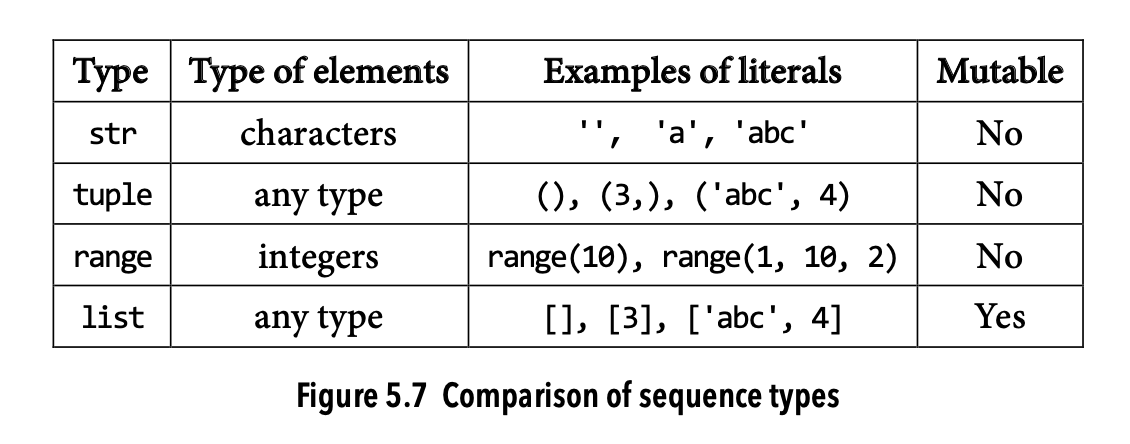

Python程序员更倾向于使用列表而不是元组。因为列表是可改变的，所以它们可用来在一个计算中递增式地构建。比如，下面的代码递增式地构建一个包含在另一个列表中的所有偶数的列表：

In [9]:
L = [8, 6, 7 ,10]
evenElems = []
for e in L:
    if e%2 == 0:
        evenElems.append(e)
print(evenElems)

[8, 6, 10]


元组的优势1是因为它的不可改变性，永远不用担心**别名问题**。

元组的优势2是因为它的不可改变性，导致它可作为字典的键key。

因为字符串仅包含字符，所以它比元组和列表要少一些通用性。

但是当你使用字符串时，有许多内置的函数可以方便地使用。比如：
- `s.count(s1)`
- `s.find(s1)`
- `s.rfind(s1)`
- `s.index(s1)`
- `s.rindex(s1)`
- `s.lower()`
- `s.replace(old,new)`
- `s.rstrip()`
- `s.split(d)`

注意：因为字符串是不可改变的，所以这些函数的所有返回值都没有副作用。

这些方法中之一是split，它取两个字符串作为参数。第二个参数指定了用来将第一个参数分隔为子字符串序列的分隔符。比如：

In [10]:
print('My favorite professor--John G.--rocks'.split(' '))

['My', 'favorite', 'professor--John', 'G.--rocks']


In [11]:
print('My favorite professor--John G.--rocks'.split('-'))

['My favorite professor', '', 'John G.', '', 'rocks']


In [12]:
print('My favorite professor--John G.--rocks'.split('--'))

['My favorite professor', 'John G.', 'rocks']


split函数的第二个参数是可选的。如果省略了，就使用任意的空白字符串(space、tab、newline、return、formfeed)来分隔第一个字符串。比如：

In [13]:
print('My favorite professor--John G.--rocks'.split())

['My', 'favorite', 'professor--John', 'G.--rocks']
